# ML Lab Week 5 by Smeet 200968236
## Excercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics

In [2]:
weather = pd.read_csv('weatherAUS.csv')
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Q6] Preprocessing

In [3]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
weather.dropna(inplace = True)

In [5]:
weather.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [6]:
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [7]:
weather['RainToday'] = weather['RainToday'].map({'No':0, 'Yes':1})
weather['RainTomorrow'] = weather['RainTomorrow'].map({'No':0, 'Yes':1})

In [8]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
#Dropping categorical attributes as they are irrelevant
x = weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']]
y = weather['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [10]:
#logistic regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)
y_pred_test = logreg.predict(x_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8524


[Text(0.5, 1.0, 'Confusion Matrix')]

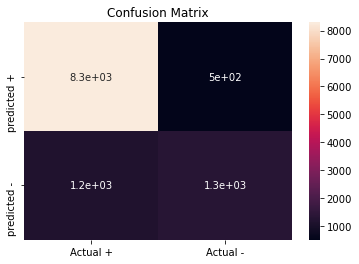

In [31]:
cm1 = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm1, annot=True, xticklabels=["Actual +", "Actual -"], yticklabels=["predicted +", "predicted -"]).set(title='Confusion Matrix')

In [27]:
tn1 = cm1[0,0]
fp1 = cm1[0,1]
fn1 = cm1[1,0]
tp1 = cm1[1,1]

acc1 = (tp1+tn1)/(tp1+tn1+fp1+fn1)
tpr1 = tp1/(fn1+tp1)
tnr1 = tn1/(tn1+fp1)
print("Metrics of Initial Model")
print("Accuracy = ", acc)
print("Sensitivity = ", tpr)
print("Specificity = ", tnr)

Metrics of Initial Model
Accuracy =  0.8523573200992556
Sensitivity =  0.5315641334941696
Specificity =  0.9430487666249858


### Q7] Variance Inflation Factor (VIF)

In [12]:
vif = pd.DataFrame()
vif["Variable"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif = vif[vif['Variable']!='intercept']
vif

,Variable,VIF
0,MinTemp,58.284148
1,MaxTemp,609.736465
2,Rainfall,1.627144
3,Evaporation,7.220027
4,Sunshine,17.318912
5,WindGustSpeed,26.969533
6,WindSpeed9am,8.403752
7,WindSpeed3pm,13.776204
8,Humidity9am,61.146908
9,Humidity3pm,47.805246


<AxesSubplot:>

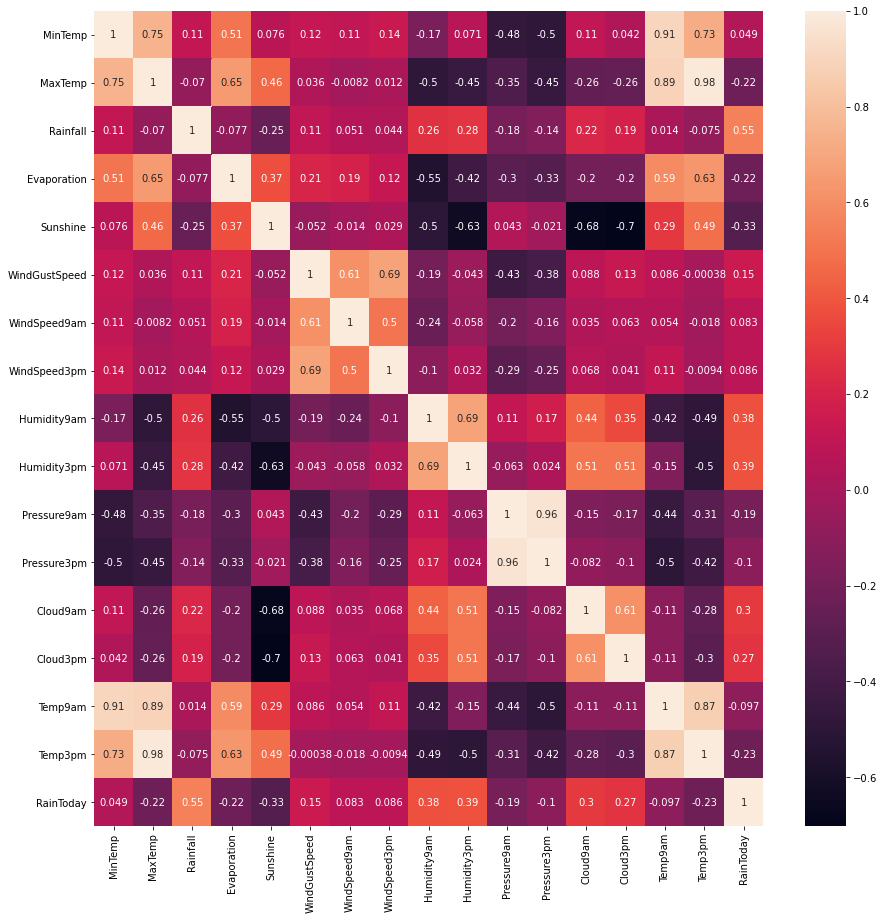

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(x.corr(), annot=True, ax=ax)

### Q8] Removing Multicollinearity

In [14]:
weather['tempmin'] = weather['MinTemp'] - weather['Temp9am']
weather['tempmax'] = weather['MaxTemp'] - weather['Temp3pm']
weather['pressure']= weather['Pressure3pm'] - weather['Pressure9am']
weather['humidity']= weather['Humidity3pm'] - weather['Humidity9am']
weather['cloud']= weather['Cloud3pm'] - weather['Cloud9am']
weather['windgust']= weather['WindGustSpeed'] - weather['WindSpeed3pm']

In [15]:
x2 = weather[[ 'tempmin', 'tempmax', 'Evaporation',
       'Sunshine', 'windgust','WindSpeed9am', 'humidity', 'pressure', 'cloud', 'RainToday', 'Rainfall']]
y2 = weather['RainTomorrow']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.2)
logreg2 = LogisticRegression(solver='liblinear')
logreg2.fit(x2_train, y2_train)
y2_pred_test = logreg2.predict(x2_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y2_test, y2_pred_test)))

Model accuracy score: 0.8389


In [16]:
vif2 = pd.DataFrame()
vif2["Variable"] = x2.columns
vif2["VIF"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif2 = vif2[vif2['Variable']!='intercept']
vif2

,Variable,VIF
0,tempmin,5.821800
1,tempmax,2.861221
2,Evaporation,4.375261
3,Sunshine,8.591449
4,windgust,6.738174
5,WindSpeed9am,5.205826
6,humidity,2.573268
7,pressure,2.985761
8,cloud,1.068182
9,RainToday,1.989174


<AxesSubplot:>

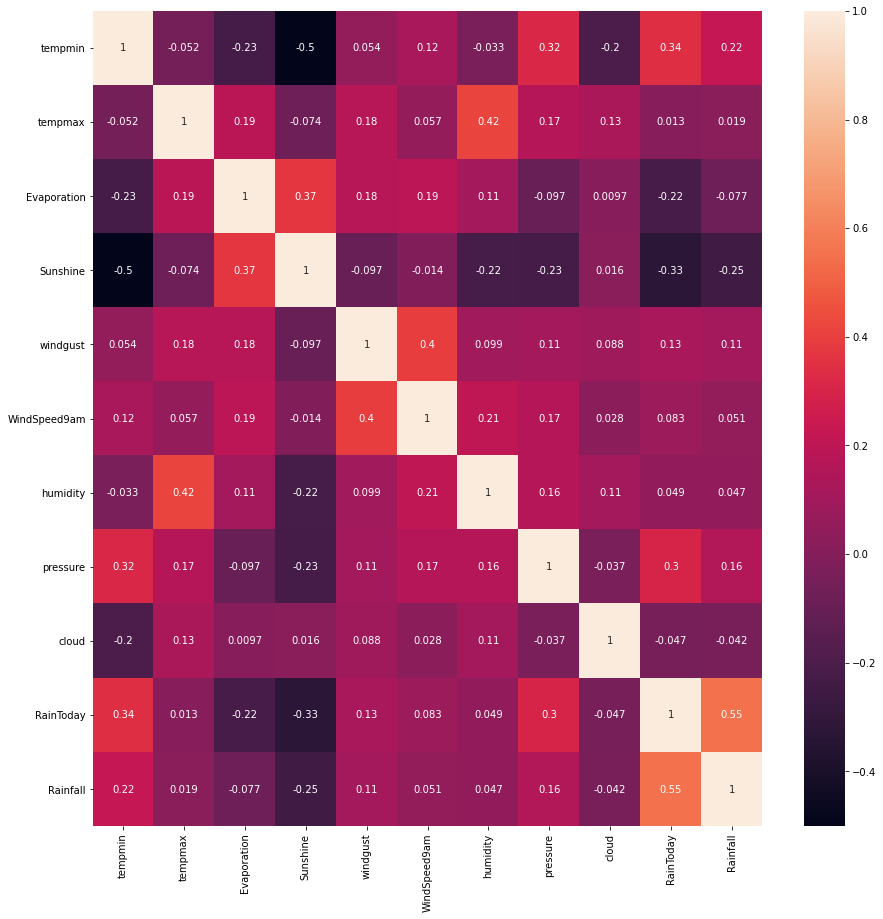

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(x2.corr(), annot=True, ax=ax)

### Q9] Removing features with VIF>5

In [18]:
#removing features = ['tempmin', 'Sunshine', 'windgust', 'WindSpeed9am']
selected_features = ['tempmax', 'Evaporation', 'humidity' ,'pressure', 'cloud', 'RainToday','Rainfall']
xf= weather[selected_features]
yf = weather['RainTomorrow']

### Q10] Final Regression Model

In [19]:
xf_train, xf_test, yf_train, yf_test = train_test_split(xf,yf,test_size=0.2)
logregf = LogisticRegression(solver='liblinear')
logregf.fit(xf_train, yf_train)
yf_pred_test = logregf.predict(xf_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(yf_test, yf_pred_test)))

Model accuracy score: 0.8134


In [20]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(xf_train, yf_train)
yf1_pred_test = logreg.predict(xf_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(yf_test, yf1_pred_test)))

Model accuracy score: 0.8134


[Text(0.5, 1.0, 'Confusion Matrix')]

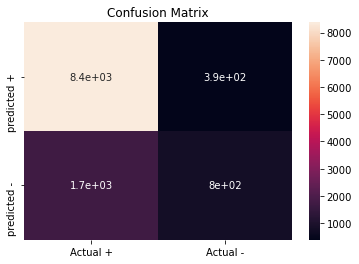

In [32]:
cm2 = confusion_matrix(yf_test, yf_pred_test)
sns.heatmap(cm2, annot=True, xticklabels=["Actual +", "Actual -"], yticklabels=["predicted +", "predicted -"]).set(title='Confusion Matrix')

In [26]:
tn2 = cm2[0,0]
fp2 = cm2[0,1]
fn2 = cm2[1,0]
tp2 = cm2[1,1]

acc2 = (tp2+tn2)/(tp2+tn2+fp2+fn2)
tpr2 = tp2/(fn2+tp2)
tnr2 = tn2/(tn+fp2)

print("Metrics after removing Multicollinearity")
print("Accuracy = ", acc2)
print("Sensitivity = ", tpr2)
print("Specificity = ", tnr2)

Metrics after removing Multicollinearity
Accuracy =  0.8133640552995391
Sensitivity =  0.3183980967486122
Specificity =  0.9645283888057123


In [29]:
print("Accuracy BEFORE VIF computations: ", acc1)
print("Accuracy AFTER VIF computations: ", acc2)

Accuracy BEFORE VIF computations:  0.8523573200992556
Accuracy AFTER VIF computations:  0.8133640552995391
